In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto"

df_observations = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\observations.csv")

**CHECK FOR NA VALUES ON DATA**

In [3]:
for csv in os.listdir(path):
    df = pd.read_csv(os.path.join(path, csv)) 
    print(f"{csv}:\n{df.isna().sum()}\n")

cloudiness.csv:
cloudiness       0
cloudiness_id    0
dtype: int64

dates.csv:
date       0
date_id    0
dtype: int64

observations.csv:
date_id               0
precipitation      2500
temp_max           2500
temp_min           2500
wind               2500
humidity              0
pressure              0
solar_radiation       0
visibility            0
weather_id            0
cloudiness_id         0
estacion_id           0
dtype: int64

seasons.csv:
estacion       0
estacion_id    0
dtype: int64

weather.csv:
weather       0
weather_id    0
dtype: int64



VISUALIZACION DE VALORES NULOS

In [4]:
# 2. Resumen de los datos nulos
print("Resumen de valores nulos por columna:")
print(df_observations.isnull().sum())

# 3. Total de nulos
total_nulos = df_observations.isnull().sum().sum()
print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")

# 4. Porcentaje de datos nulos por columna
porcentaje_nulos = (df_observations.isnull().sum() / len(df_observations)) * 100
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)

Resumen de valores nulos por columna:
date_id               0
precipitation      2500
temp_max           2500
temp_min           2500
wind               2500
humidity              0
pressure              0
solar_radiation       0
visibility            0
weather_id            0
cloudiness_id         0
estacion_id           0
dtype: int64

Total de valores nulos en el DataFrame: 10000

Porcentaje de valores nulos por columna:
date_id             0.0
precipitation      10.0
temp_max           10.0
temp_min           10.0
wind               10.0
humidity            0.0
pressure            0.0
solar_radiation     0.0
visibility          0.0
weather_id          0.0
cloudiness_id       0.0
estacion_id         0.0
dtype: float64


<Figure size 1500x1000 with 0 Axes>

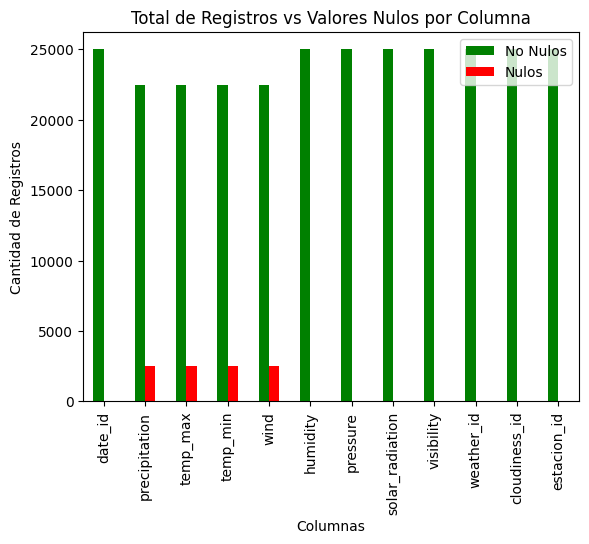

In [5]:
# Calcular la cantidad de valores nulos por columna
null_counts = df_observations.isnull().sum()

# Calcular el total de registros por columna
total_counts = df_observations.shape[0]

# Crear una nueva DataFrame con los datos para graficar
data = pd.DataFrame({
    'No Nulos': total_counts - null_counts.values,
    'Nulos': null_counts.values
}, index=null_counts.index)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear el gráfico de barras apiladas (gráfico de columnas agrupadas)
data.plot(kind='bar', stacked=False, color=['green', 'red'])

# Títulos y etiquetas
plt.title("Total de Registros vs Valores Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario

# Agregar leyenda
plt.legend(["No Nulos", "Nulos"])

# Mostrar el gráfico
plt.show()

       precipitation      temp_max      temp_min          wind
count   22500.000000  22500.000000  22500.000000  22500.000000
mean       27.752615     16.967502      3.657439      4.929624
std        16.027512     10.678786      6.663217      2.627122
min         0.000950     -1.599122     -7.099699      0.400440
25%        14.013100      7.786814     -1.871769      2.649068
50%        27.510842     16.977533      2.803611      4.921028
75%        41.429830     26.115989      8.758843      7.197403
max        55.899713     35.599908     18.297301      9.498636


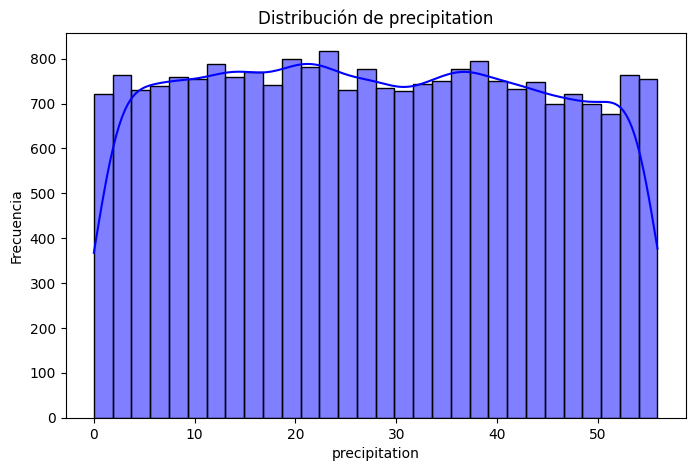

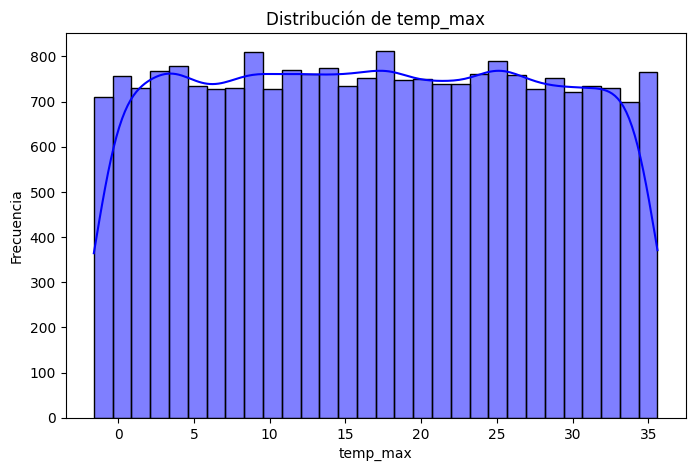

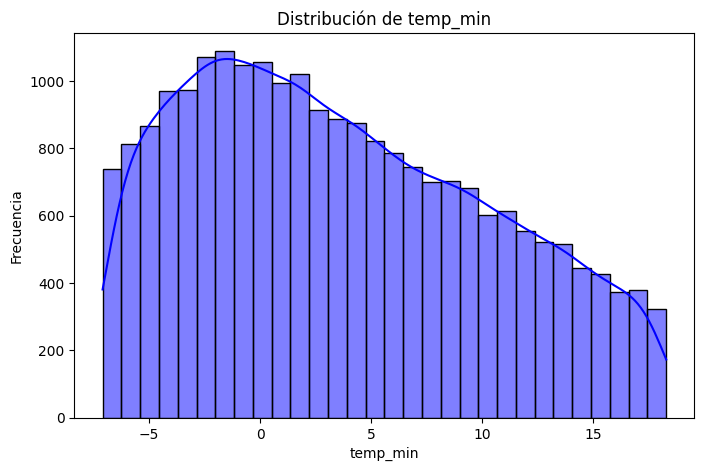

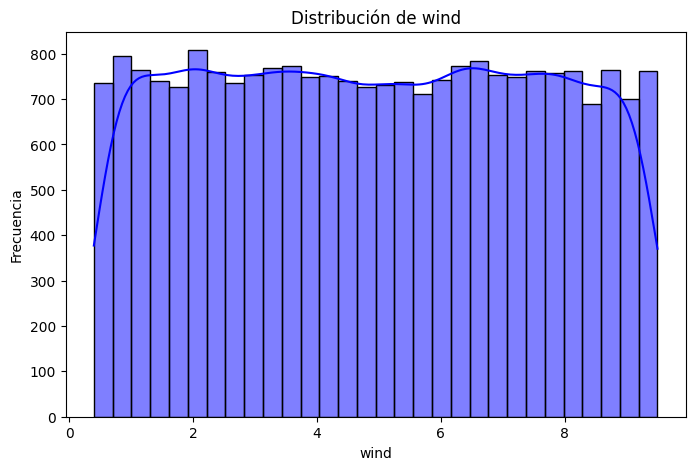

In [6]:
# Estadísticas descriptivas de las columnas con nulos
cols_nulos = ['precipitation', 'temp_max', 'temp_min', 'wind']
print(df_observations[cols_nulos].describe())

# Histograma de cada columna
for col in cols_nulos:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_observations[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

IMPUTACION DE VALORES NULOS PARA temp_min y temp_max

Opciones:

1.  Por estacion
2.  Por la media de la misma fecha de años anteriores
3.  P

**ANALISIS DE DATOS**

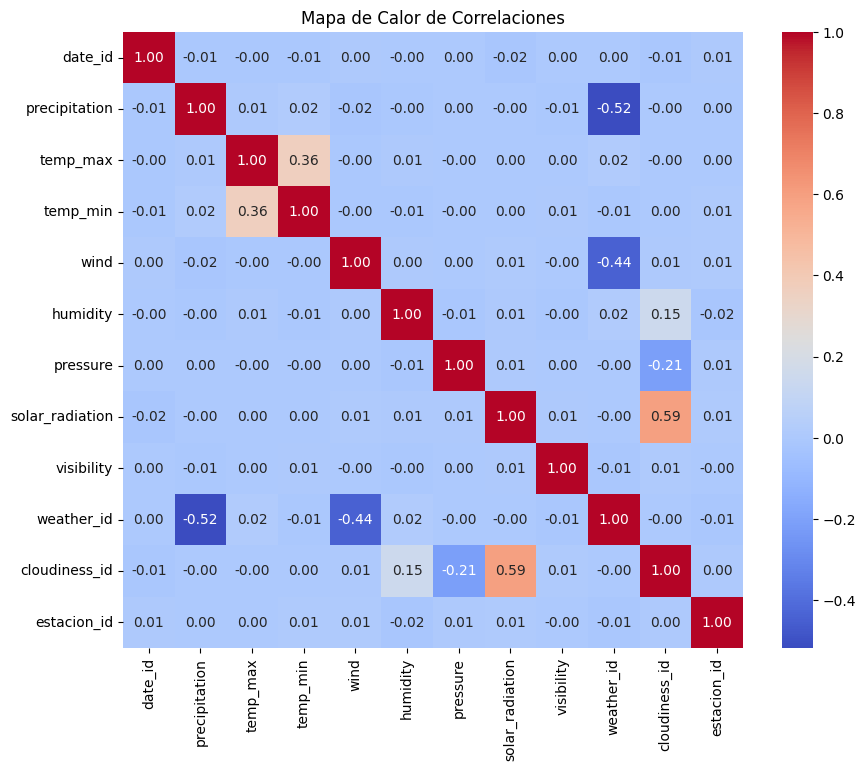

In [7]:
data = pd.read_csv(r"C:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Projecte3_Meteorologia\Datos_Proyecto\observations.csv")

data_cleaned = data.dropna()

numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


**VISUALIZAR LOS DATOS QUE RESALTAN EN EL GRÁFICO DE CORRELACIONES**

WEATHER_ID

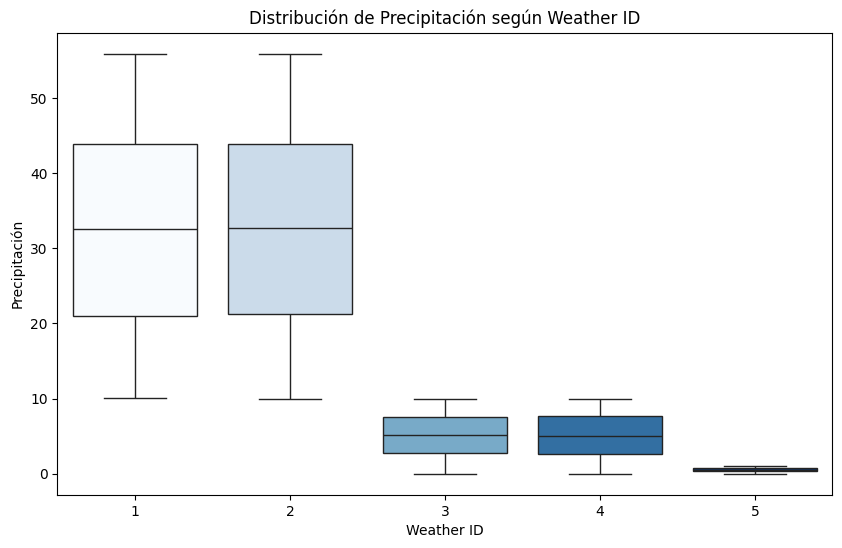

C:\Users\joant\AppData\Local\Temp\ipykernel_12924\109092014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_id', y='wind', data=data_cleaned, palette='Greens')


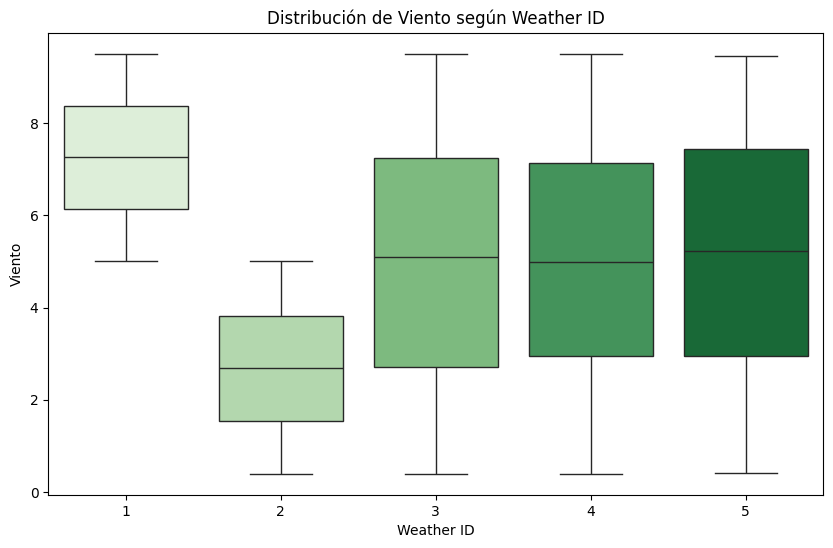

In [8]:
# Boxplot de weather_id vs precipitación
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_id', y='precipitation', hue='weather_id', data=data_cleaned, palette='Blues', legend=False)
plt.title('Distribución de Precipitación según Weather ID')
plt.xlabel('Weather ID')
plt.ylabel('Precipitación')
plt.show()

# Boxplot de weather_id vs viento
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_id', y='wind', data=data_cleaned, palette='Greens')
plt.title('Distribución de Viento según Weather ID')
plt.xlabel('Weather ID')
plt.ylabel('Viento')
plt.show()

C:\Users\joant\AppData\Local\Temp\ipykernel_12924\951737303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cloudiness_id', y='solar_radiation', data=data_cleaned, palette='Reds')


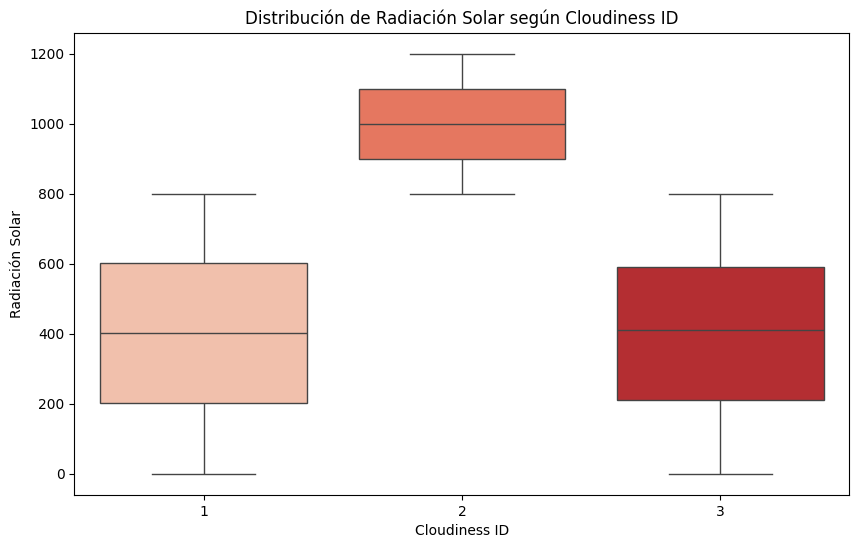

In [9]:
# Boxplot de weather_id vs viento
plt.figure(figsize=(10, 6))
sns.boxplot(x='cloudiness_id', y='solar_radiation', data=data_cleaned, palette='Reds')
plt.title('Distribución de Radiación Solar según Cloudiness ID')
plt.xlabel('Cloudiness ID')
plt.ylabel('Radiación Solar')
plt.show()

**CARGAR LOS DATOS SQL Y CREAR LOS GRAFICOS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar cada tabla en un DataFrame de pandas
df_cloudiness = pd.read_sql_query("SELECT * FROM cloudiness", conn)
df_dates = pd.read_sql_query("SELECT * FROM dates", conn)
df_observations = pd.read_sql_query("SELECT * FROM observations", conn)
df_weather = pd.read_sql_query("SELECT * FROM weather", conn)
df_seasons = pd.read_sql_query("SELECT * FROM seasons", conn)

# Cerrar la conexión cuando hayas terminado
conn.close()

# Unir las tablas usando merge
df = df_observations \
    .merge(df_dates, on='date_id') \
    .merge(df_weather, on='weather_id') \
    .merge(df_cloudiness, on='cloudiness_id') \
    .merge(df_seasons, on='estacion_id')


DISTRIBUCIÓN DE LAS TEMPERATURAS MAXIMAS

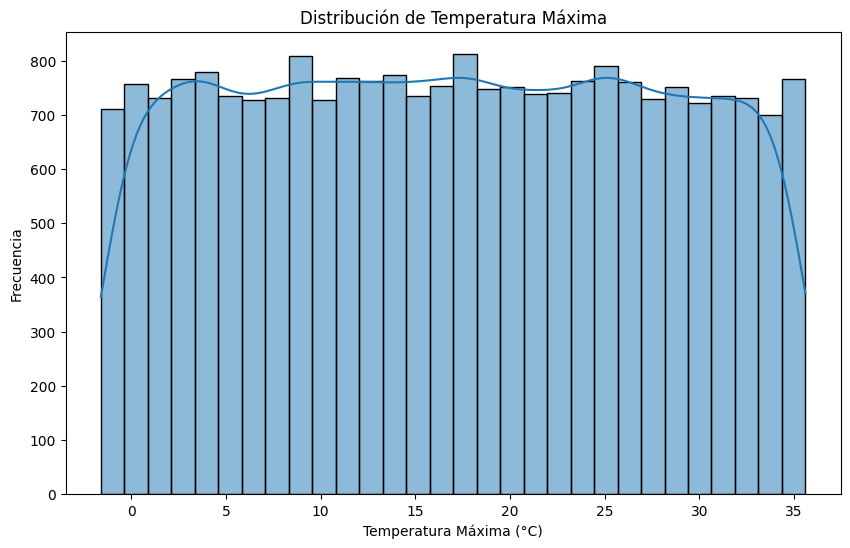

In [ ]:
# Graficar un histograma de temperatura máxima
plt.figure(figsize=(10, 6))
sns.histplot(df['temp_max'].dropna(), bins=30, kde=True)
plt.title("Distribución de Temperatura Máxima")
plt.xlabel("Temperatura Máxima (°C)")
plt.ylabel("Frecuencia")
plt.show()

TEMPERATURA MAX/MIN POR FECHA

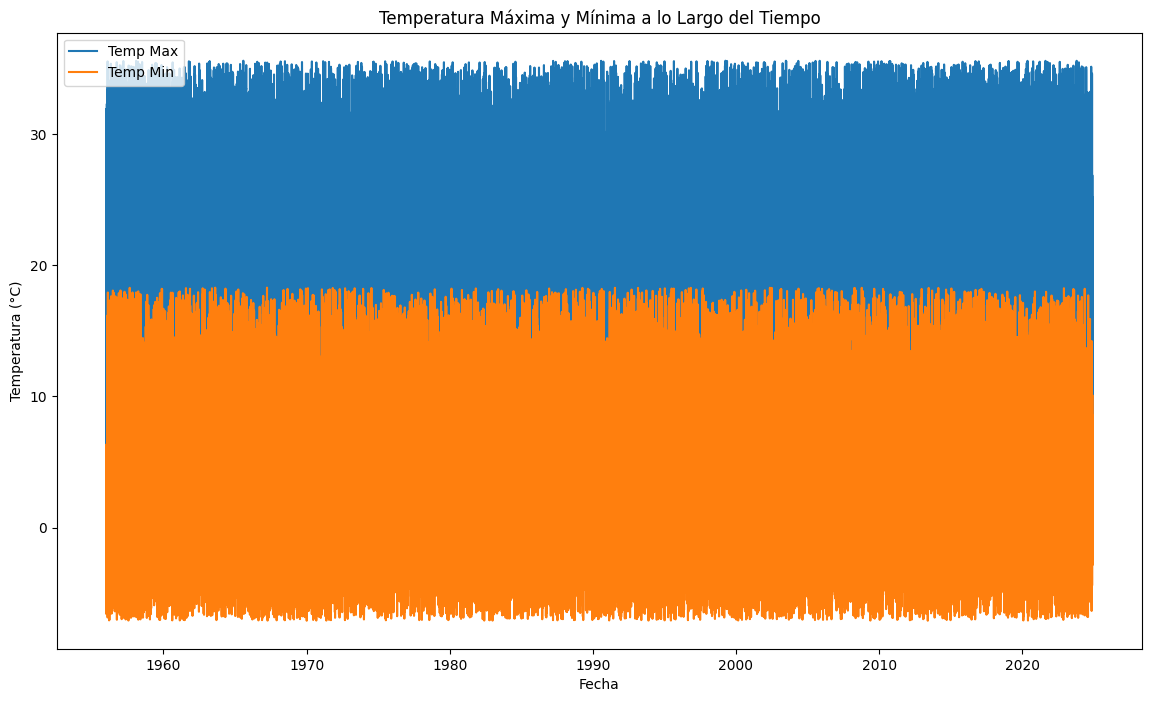

In [ ]:
# Convertir la columna de fechas a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Graficar temperatura máxima y mínima a lo largo del tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='temp_max', data=df, label='Temp Max')
sns.lineplot(x='date', y='temp_min', data=df, label='Temp Min')
plt.title("Temperatura Máxima y Mínima a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

HUMEDAD POR CONDICION CLIMATICA

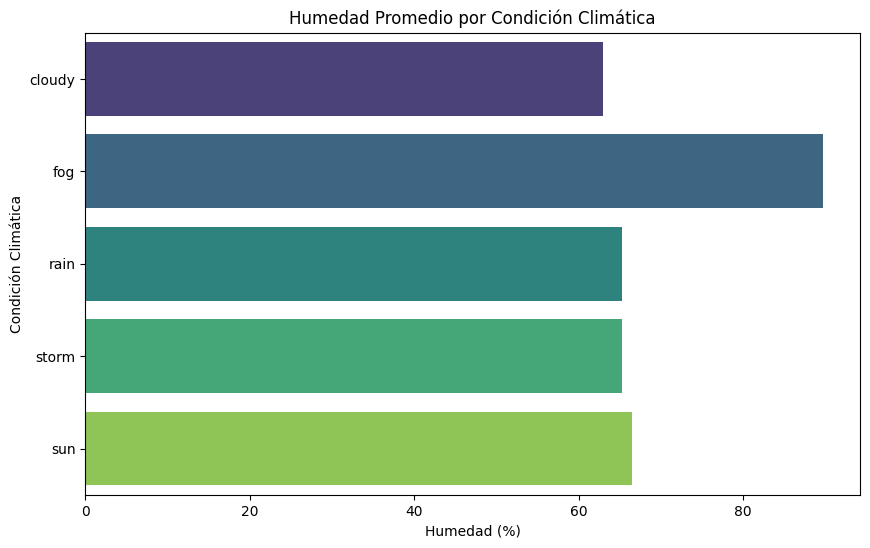

In [ ]:
# Calcular la humedad promedio por tipo de clima
df_weather_humidity = df.groupby('weather')['humidity'].mean().reset_index()

# Graficar la humedad promedio por tipo de clima
plt.figure(figsize=(10, 6))
sns.barplot(x='humidity', y='weather', hue='weather', data=df_weather_humidity, palette="viridis", legend=False)
plt.title("Humedad Promedio por Condición Climática")
plt.xlabel("Humedad (%)")
plt.ylabel("Condición Climática")
plt.show()

TEMPERATURA MÁXIMA POR TIPO DE TIEMPO

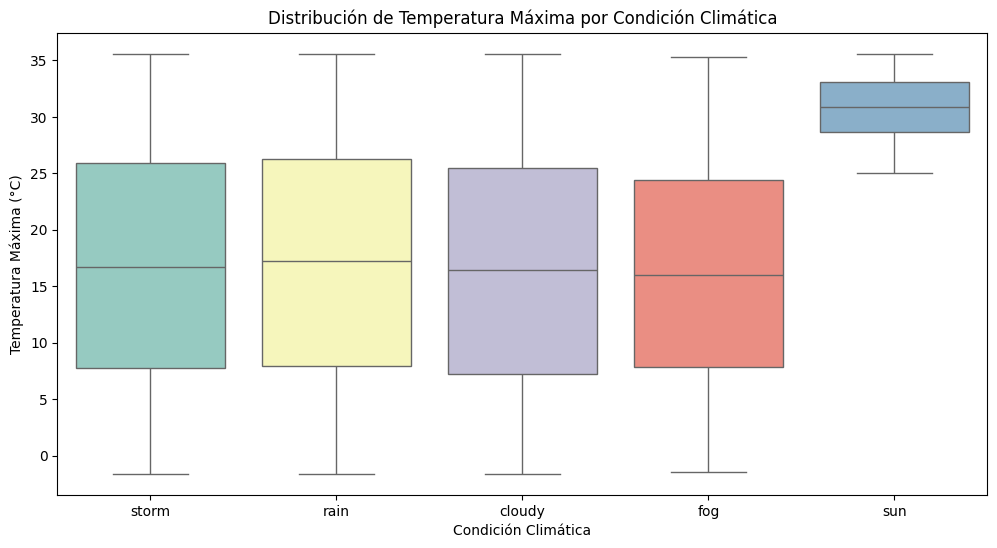

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='temp_max', hue='weather', data=df, palette="Set3", legend=False)
plt.title("Distribución de Temperatura Máxima por Condición Climática")
plt.xlabel("Condición Climática")
plt.ylabel("Temperatura Máxima (°C)")
plt.show()

VIENTO vs PRESIÓN

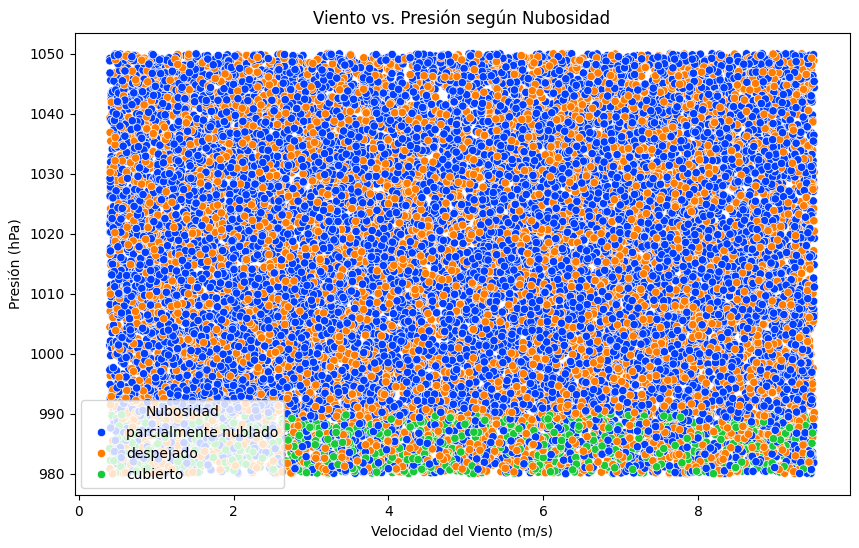

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind', y='pressure', hue='cloudiness', data=df, palette="bright")
plt.title("Viento vs. Presión según Nubosidad")
plt.xlabel("Velocidad del Viento (m/s)")
plt.ylabel("Presión (hPa)")
plt.legend(title="Nubosidad")
plt.show()

PRECIPITACION POR VIENTO Y TIPO DE TIEMPO

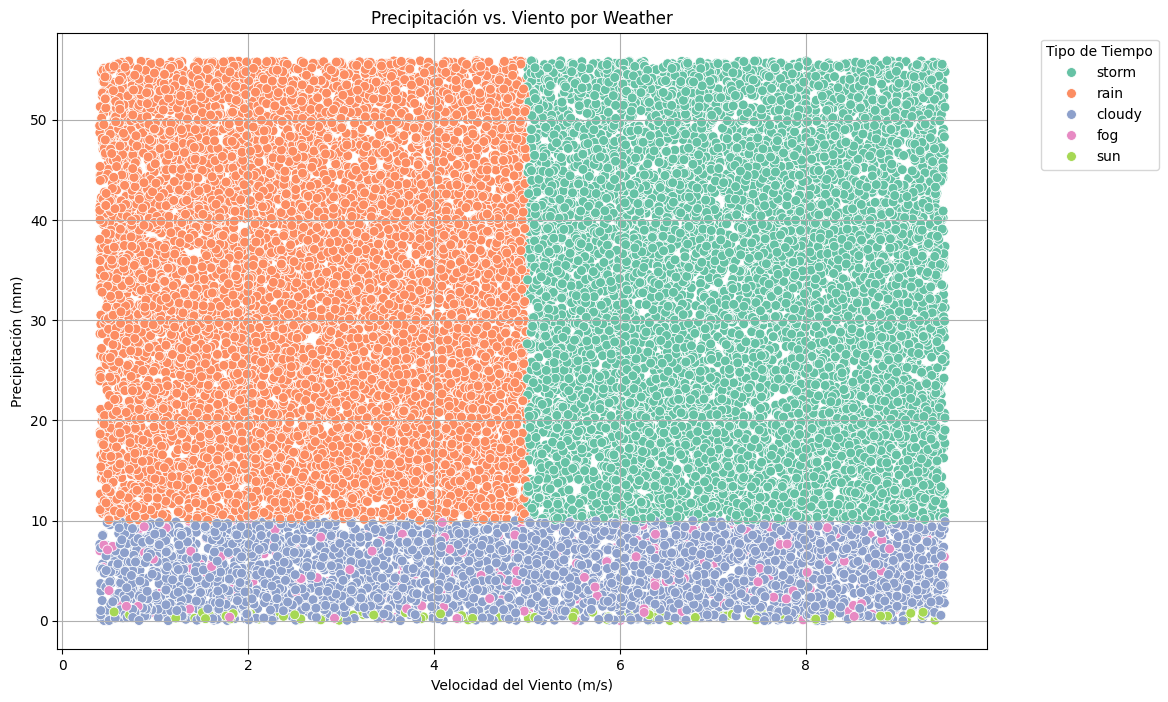

In [ ]:
# Graficar
plt.figure(figsize=(12, 8))
sns.scatterplot(x='wind', y='precipitation', hue='weather', data=df, palette="Set2", s=50)
plt.title("Precipitación vs. Viento por Weather")
plt.xlabel("Velocidad del Viento (m/s)")
plt.ylabel("Precipitación (mm)")
plt.legend(title='Tipo de Tiempo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


PRECIPITACIÓN POR TIPO DE TIEMPO

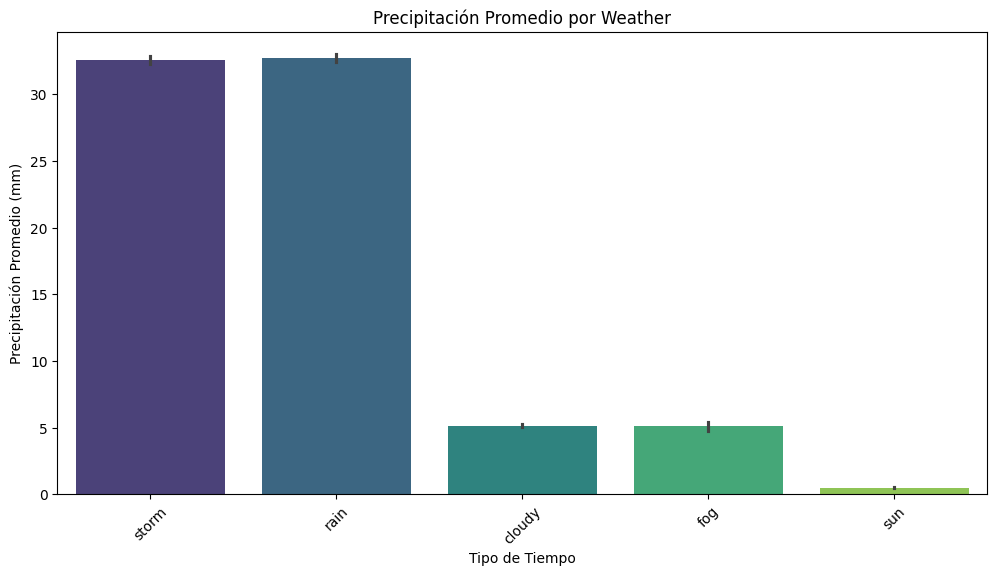

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='weather', y='precipitation', hue='weather', data=df, palette="viridis", legend=False)
plt.title("Precipitación Promedio por Weather")
plt.xlabel("Tipo de Tiempo")
plt.ylabel("Precipitación Promedio (mm)")
plt.xticks(rotation=45)
plt.show()

TEMPERATURA PROMEDIO POR MES

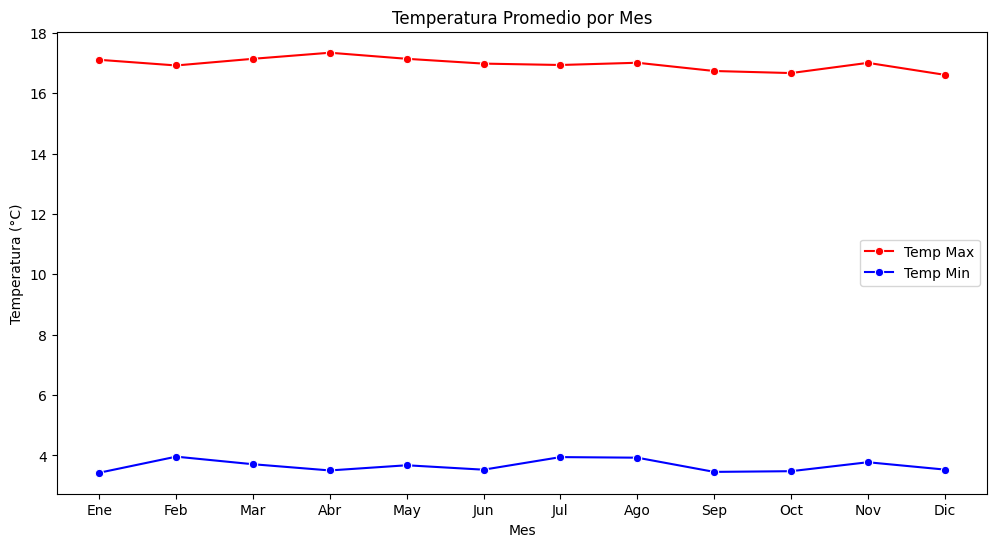

In [ ]:
# CONVERTIR date A datetime
df['date'] = pd.to_datetime(df['date'])

# EXTRAER MES Y AÑO
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# AGRUPAR POR MES Y CALCULAR LA TEMPERATURA PROMEDIO
df_temp_by_month = df.groupby('month').agg({'temp_max': 'mean', 'temp_min': 'mean'}).reset_index()

# MOSTRAR GRAFICO
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temp_by_month, x='month', y='temp_max', marker='o', label='Temp Max', color='red')
sns.lineplot(data=df_temp_by_month, x='month', y='temp_min', marker='o', label='Temp Min', color='blue')
plt.title("Temperatura Promedio por Mes")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.xticks(ticks=df_temp_by_month['month'], labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.legend()
plt.show()


TEMPERATURA PROMEDIO POR AÑO

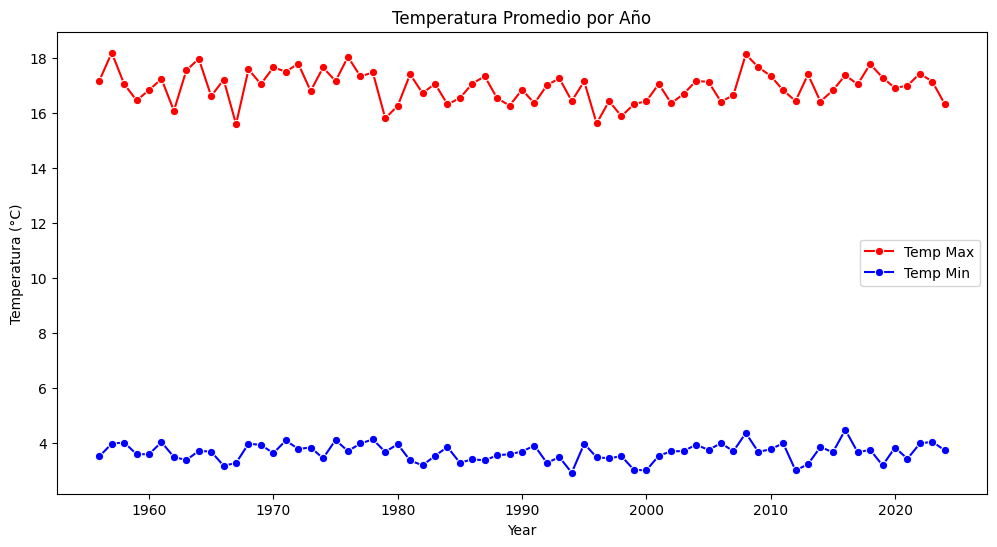

In [ ]:
# CONVERTIR date A datetime
df['date'] = pd.to_datetime(df['date'])

# EXTRAER MES Y AÑO
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# AGRUPAR POR MES Y CALCULAR LA TEMPERATURA PROMEDIO
df_temp_by_month = df.groupby('year').agg({'temp_max': 'mean', 'temp_min': 'mean'}).reset_index()

# MOSTRAR GRAFICO
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temp_by_month, x='year', y='temp_max', marker='o', label='Temp Max', color='red')
sns.lineplot(data=df_temp_by_month, x='year', y='temp_min', marker='o', label='Temp Min', color='blue')
plt.title("Temperatura Promedio por Año")
plt.xlabel("Year")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()


CORRELACIÓN ENTRE CARIABLES METEOROÑLÓGICAS

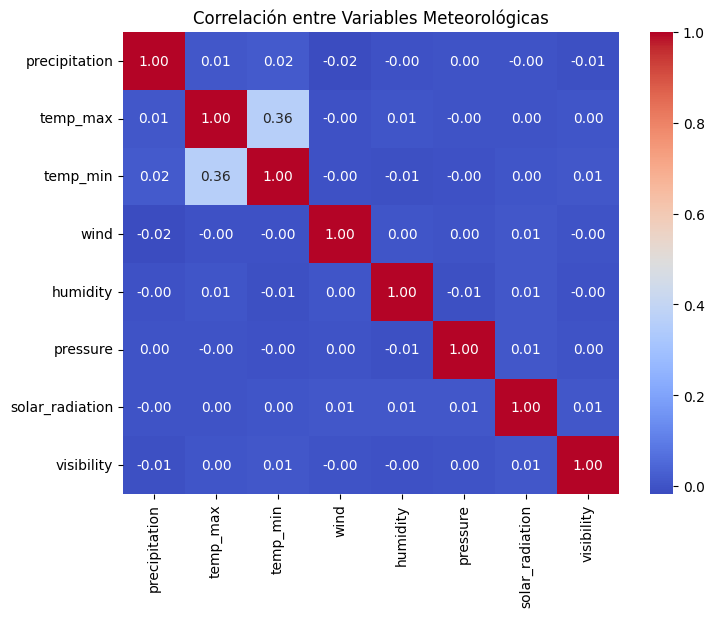

In [ ]:
# Selecciona las columnas relevantes para la correlación
correlation_df = df[['precipitation', 'temp_max', 'temp_min', 'wind', 'humidity', 'pressure', 'solar_radiation', 'visibility']]

# Calcula la matriz de correlación
correlation_matrix = correlation_df.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Variables Meteorológicas')
plt.show()

VARIABILIDAD DE LA VISIBILIDAD POR CONDICIÓN CLIMÁTICA

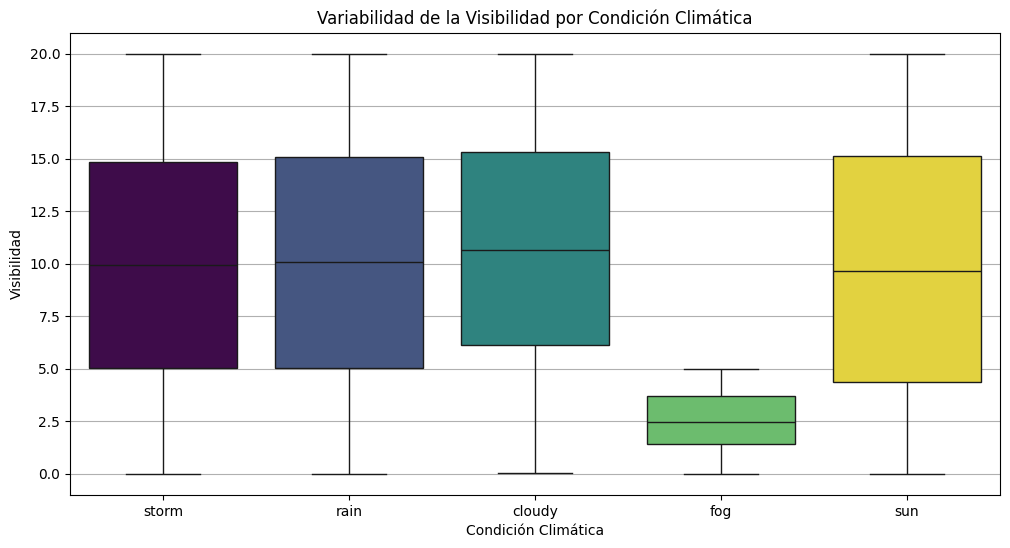

In [ ]:
# Grafica de la visibilidad por condición climática
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weather', y='visibility', hue='weather_id', palette="viridis", legend=False)
plt.title('Variabilidad de la Visibilidad por Condición Climática')
plt.xlabel('Condición Climática')
plt.ylabel('Visibilidad')
plt.grid(axis='y')
plt.show()


TEMPERATURA MÁXIMA Y MÍNIMA PROMEDIO POR ESTACIÓN DEL AÑO

<Figure size 1000x600 with 0 Axes>

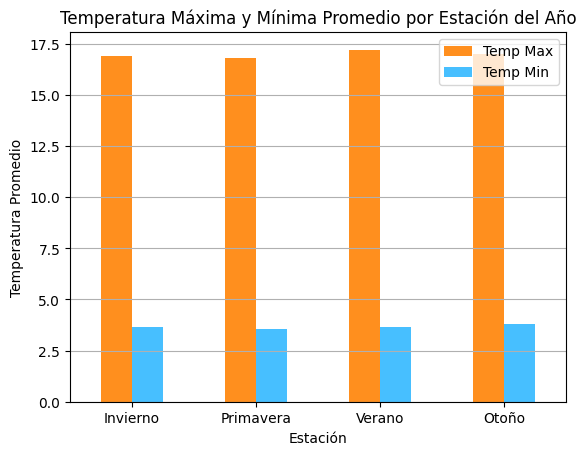

In [ ]:
# Temperatura promedio por estación
temp_seasonal_avg = df.groupby('estacion')[['temp_max', 'temp_min']].mean()

# Gráfica de barras para temperatura máxima y mínima por estación
plt.figure(figsize=(10, 6))
temp_seasonal_avg.plot(kind='bar', color=['#ff8f1e','#47bfff'])
plt.title('Temperatura Máxima y Mínima Promedio por Estación del Año')
plt.xlabel('Estación')
plt.xticks(ticks=range(4), labels=['Invierno', 'Primavera', 'Verano', 'Otoño'], rotation=0)
plt.ylabel('Temperatura Promedio')
plt.legend(['Temp Max', 'Temp Min'])
plt.grid(axis='y')
plt.show()
